In [20]:
import numpy as np
import pickle
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf


path_1 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S1/S1.pkl'
path_2 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S2/S2.pkl'
path_3 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S3/S3.pkl'
path_4 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S4/S4.pkl'
path_5 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S5/S5.pkl'
path_6 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S6/S6.pkl'
path_7 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S7/S7.pkl'
path_8 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S8/S8.pkl'
path_9 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S9/S9.pkl'
path_10 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S10/S10.pkl'
path_11 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S11/S11.pkl'
path_12 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S12/S12.pkl'
path_13 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S13/S13.pkl'
path_14 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S14/S14.pkl'
path_15 = 'H:/MSC Data Science/Dissertation/data/PPG_FieldStudy/S15/S15.pkl'


In [2]:
def load_data(file_path):
    S = pickle.load(open(file_path, 'rb'), encoding='latin1')#load pkl file as origin data
    S_X = S['signal']#extract signal data
    S_X_chest = S_X['chest']
    S_X_wrist = S_X['wrist']#divide sigbals into chest and wrist
    S_y = S['label']#extract heart rates
    
    S_X_chest_ACC = S_X_chest['ACC']
    chest_ACC_1, chest_ACC_2, chest_ACC_3 = zip(*S_X_chest_ACC)#chest_ACC is a 3 dimension array，here divide it into 3 indiviuals 
    S_X_chest_ECG = S_X_chest['ECG']
    S_X_chest_Resp = S_X_chest['Resp']
    
    S_X_wrist_ACC = S_X_wrist['ACC']
    wrist_ACC_1, wrist_ACC_2, wrist_ACC_3 = zip(*S_X_wrist_ACC)
    S_X_wrist_EDA = S_X_wrist['EDA']
    S_X_wrist_BVP = S_X_wrist['BVP']
    S_X_wrist_TEMP = S_X_wrist['TEMP']
    
    def extract_column(column):
        col = np.asarray(column)
        a = len(column)   
        b = len(S_y)
        c = a//b
        d = int(b * c)#the number of saved rows
        new_col = col[0:d]
        extracted_column = np.mean(new_col.reshape(-1, c), axis=1)
        #calculate the mean of per e signals to fit the number of heart rates
        return extracted_column
    
    #normalize all columns to save them in one table
    chest_ACC_1 = extract_column(chest_ACC_1)
    chest_ACC_2 = extract_column(chest_ACC_2)
    chest_ACC_3 = extract_column(chest_ACC_3)
    chest_ECG = extract_column(S_X_chest_ECG)
    chest_Resp = extract_column(S_X_chest_Resp)
    wrist_ACC_1 = extract_column(wrist_ACC_1)
    wrist_ACC_2 = extract_column(wrist_ACC_2)
    wrist_ACC_3 = extract_column(wrist_ACC_3)
    wrist_EDA = extract_column(S_X_wrist_EDA)
    wrist_BVP = extract_column(S_X_wrist_BVP)
    wrist_TEMP = extract_column(S_X_wrist_TEMP)

    dataset = pd.DataFrame({'label':S_y,
                            'chest_ACC_1': chest_ACC_1, 
                            'chest_ACC_2': chest_ACC_2, 
                            'chest_ACC_3': chest_ACC_3, 
                            'chest_ECG': chest_ECG, 
                            'chest_Resp': chest_Resp,
                            'wrist_ACC_1': wrist_ACC_1, 
                            'wrist_ACC_2': wrist_ACC_2, 
                            'wrist_ACC_3': wrist_ACC_3, 
                            'wrist_EDA': wrist_EDA,
                            'wrist_BVP': wrist_BVP,
                            'wrist_TEMP': wrist_TEMP,
                           }, 
                            columns=['label', 'chest_ACC_1', 'chest_ACC_2', 'chest_ACC_3', 'chest_ECG', 'chest_Resp', 
                                     'wrist_ACC_1', 'wrist_ACC_2', 'wrist_ACC_3', 'wrist_EDA', 'wrist_BVP', 'wrist_TEMP'])
    
    return dataset   
    

In [3]:
S1 = load_data(path_1)
S2 = load_data(path_2)
S3 = load_data(path_3)
S4 = load_data(path_4)
S5 = load_data(path_5)
S6 = load_data(path_6)
S7 = load_data(path_7)
S8 = load_data(path_8)
S9 = load_data(path_9)
S10 = load_data(path_10)
S11 = load_data(path_11)
S12 = load_data(path_12)
S13 = load_data(path_13)
S14 = load_data(path_14)
S15 = load_data(path_15)

In [4]:
df_groups = [S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14]
df_merged = pd.concat(df_groups)
print(df_merged)
df_merged.shape

          label  chest_ACC_1  chest_ACC_2  chest_ACC_3  chest_ECG  chest_Resp  \
0     49.611369     0.851230    -0.066021    -0.369793   0.039022    1.320817   
1     50.323992     0.853035    -0.064653    -0.372883  -0.037044   -1.524349   
2     52.708336     0.862127    -0.063661    -0.328341   0.021329    0.497232   
3     55.640794     0.884370    -0.063035    -0.265127   0.006393    0.409606   
4     57.658406     0.889886    -0.042930    -0.247533  -0.024418   -0.779251   
...         ...          ...          ...          ...        ...         ...   
4471  84.753006     0.902970     0.095082    -0.020710  -0.011552   -1.302002   
4472  84.740735     0.902274     0.106434     0.007407  -0.030648   -1.383360   
4473  83.091148     0.903300     0.106460    -0.013936   0.003935    1.109771   
4474  80.926302     0.903688     0.102778    -0.012434  -0.004523    1.636763   
4475  81.653373     0.902356     0.109037    -0.007193   0.011958    0.219438   

      wrist_ACC_1  wrist_AC

(60731, 12)

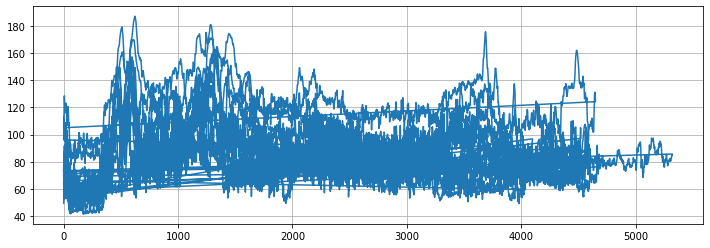

In [5]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.plot(df_merged['label'])
plt.show()

In [6]:
#y = df_merged['label']#extract heart rate as label
#X = df_merged.drop(columns = ['label'],inplace = False)#extract training variables
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#split train and validation datasets

In [7]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()

X = df_merged.drop(columns = ['label'],inplace = False)
y = df_merged['label']
lrModel.fit(X,y)
lrModel.score(X,y)

0.24043214670838953

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_train_predict = lin_model.predict(X_train)
mse = (mean_squared_error(y_train, y_train_predict))


print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)

mse = (mean_squared_error(y_test, y_test_predict))



print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))

The model performance for training set
--------------------------------------
MSE is 399.99838835130396


The model performance for testing set
--------------------------------------
MSE is 402.8657012422714


In [23]:
#LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
from keras.utils import np_utils
# Build LSTM network
model = Sequential()
model.add(LSTM(nb_lstm, input_shape=(11,0), 
               return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(nb_lstm, 
               return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#split train and validation datasets

# Train
history = model.fit(X_train, y_train, epochs=nb_epoch, 
                    batch_size=batch_size, shuffle=True, verbose=1,
                    validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 11, 64)            16640     
                                                                 
 dropout_4 (Dropout)         (None, 11, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,314
Trainable params: 50,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


ValueError: in user code:

    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\input_spec.py", line 213, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 11)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 11), dtype=float64)
      • training=True
      • mask=None


In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

ValueError: in user code:

    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\conler\appdata\local\programs\python\python39\lib\site-packages\keras\engine\input_spec.py", line 213, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 11)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 11), dtype=float64)
      • training=False
      • mask=None


In [22]:
#Conv1d
import torch
import torch.nn as nn
torch.manual_seed(2021)
data = tf.constant(df_merged)
#data = data.unsqueeze(0)#用于增加维度
print(data.shape)

(60731, 12)
